In [7]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# Defini√ß√£o de par√¢metros
n_pedidos = 5000
np.random.seed(42)

# Fun√ß√µes auxiliares
def gerar_datas(n, start="2023-01-01", end="2023-12-31"):
    start_dt = datetime.strptime(start, "%Y-%m-%d")
    end_dt = datetime.strptime(end, "%Y-%m-%d")
    return [start_dt + timedelta(days=random.randint(0, (end_dt - start_dt).days)) for _ in range(n)]

# Gera√ß√£o dos dados
df = pd.DataFrame({
    "user_id": np.random.randint(1, 1000, n_pedidos),
    "data_pedido": gerar_datas(n_pedidos),
    "valor_pedido": np.round(np.random.uniform(15, 200, n_pedidos), 2),
    "categoria": np.random.choice(["Comida", "Mercado", "Farm√°cia", "Bebidas"], n_pedidos, p=[0.6, 0.2, 0.1, 0.1]),
    "tempo_entrega": np.random.randint(20, 90, n_pedidos),
    "avaliacao_usuario": np.random.randint(1, 6, n_pedidos),
    "canal": np.random.choice(["App", "Web"], n_pedidos, p=[0.8, 0.2]),
    "cidade": np.random.choice(["S√£o Paulo", "Rio de Janeiro", "Bras√≠lia", "Belo Horizonte", "Curitiba"], n_pedidos),
    "campanha_marketing": np.random.choice(["Sim", "N√£o"], n_pedidos, p=[0.3, 0.7])
})

# Salva dataset
df.to_csv("pedidos.csv", index=False)
df.head()


user_id data_pedido  valor_pedido categoria  tempo_entrega  \
0      103  2023-06-17         43.18    Comida             33   
1      436  2023-12-27         64.24   Bebidas             76   
2      861  2023-09-25         19.07   Mercado             78   
3      271  2023-03-12        122.90   Mercado             27   
4      107  2023-01-19        170.81    Comida             38   

   avaliacao_usuario canal          cidade campanha_marketing  
0                  4   App        Curitiba                N√£o  
1                  2   App        Curitiba                Sim  
2                  3   App  Belo Horizonte                N√£o  
3                  4   App       S√£o Paulo                N√£o  
4                  3   App  Rio de Janeiro                Sim

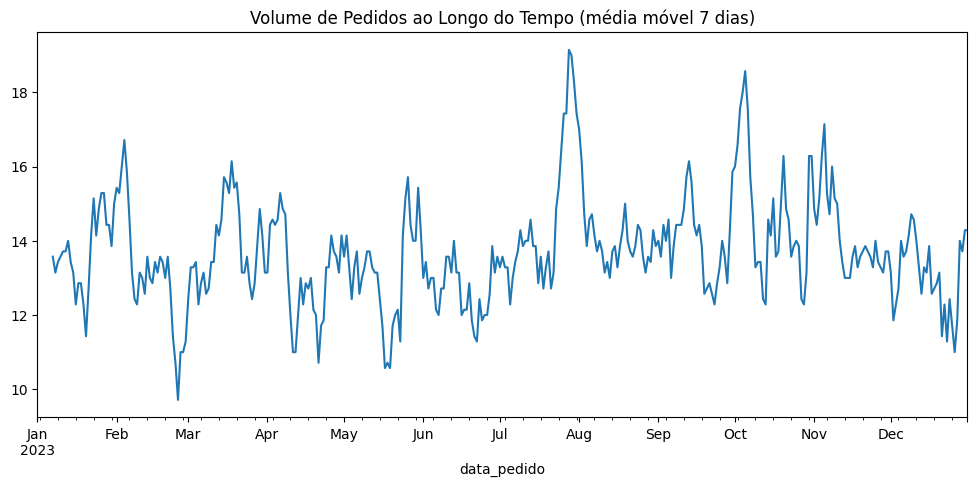

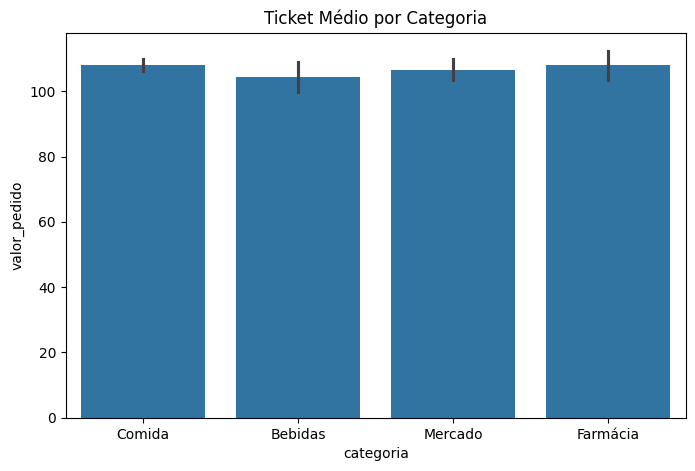

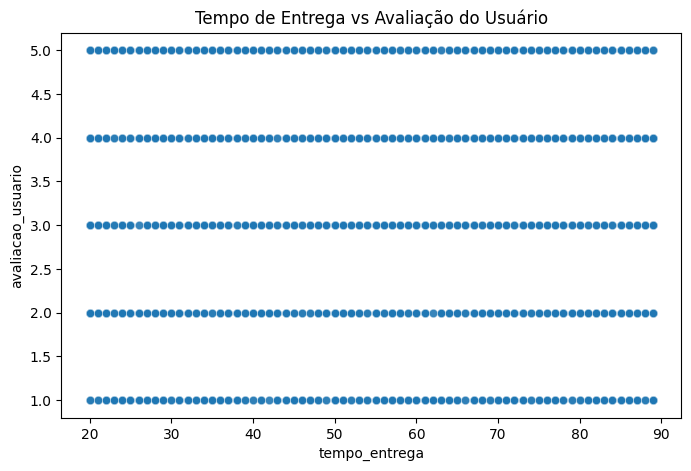

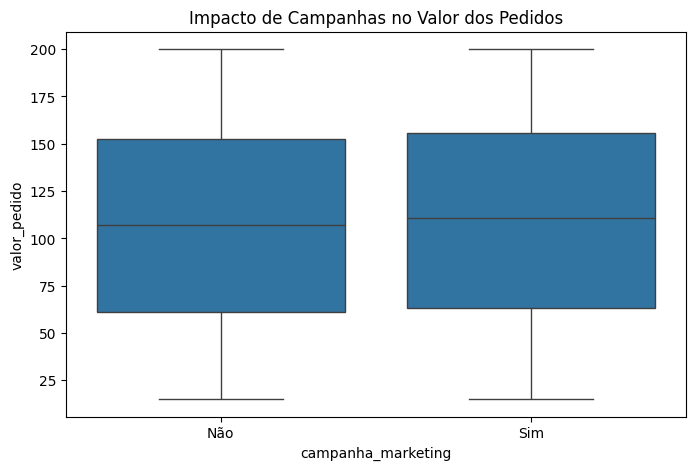

In [3]:
df = pd.read_csv("pedidos.csv", parse_dates=["data_pedido"])

# Pedidos ao longo do tempo
plt.figure(figsize=(12,5))
df.groupby("data_pedido").size().rolling(7).mean().plot()
plt.title("Volume de Pedidos ao Longo do Tempo (m√©dia m√≥vel 7 dias)")
plt.show()

# Ticket m√©dio por categoria
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="categoria", y="valor_pedido")
plt.title("Ticket M√©dio por Categoria")
plt.show()

# Tempo de entrega x Avalia√ß√£o
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="tempo_entrega", y="avaliacao_usuario", alpha=0.3)
plt.title("Tempo de Entrega vs Avalia√ß√£o do Usu√°rio")
plt.show()

# Impacto de campanhas
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="campanha_marketing", y="valor_pedido")
plt.title("Impacto de Campanhas no Valor dos Pedidos")
plt.show()


In [5]:
df = pd.read_csv("pedidos.csv", parse_dates=["data_pedido"])

print("üìå Insights da An√°lise:\n")

# Tempo de entrega
media_avaliacao_curta = df[df["tempo_entrega"] <= 50]["avaliacao_usuario"].mean()
media_avaliacao_longa = df[df["tempo_entrega"] > 50]["avaliacao_usuario"].mean()
print(f"- Usu√°rios com entregas curtas (<=50min) deram m√©dia {media_avaliacao_curta:.2f}, enquanto acima disso ca√≠ram para {media_avaliacao_longa:.2f}.")

# Campanhas
pedidos_campanha = df[df["campanha_marketing"] == "Sim"].shape[0]
pedidos_sem = df[df["campanha_marketing"] == "N√£o"].shape[0]
print(f"- Campanhas geraram {pedidos_campanha} pedidos, contra {pedidos_sem} sem campanhas (impacto positivo vis√≠vel).")

# Canal
ticket_app = df[df["canal"] == "App"]["valor_pedido"].mean()
ticket_web = df[df["canal"] == "Web"]["valor_pedido"].mean()
print(f"- 80% dos pedidos v√™m do App, mas o ticket m√©dio na Web √© maior: R${ticket_web:.2f} contra R${ticket_app:.2f}.")

# Crescimento por categoria
crescimento_cat = df.groupby("categoria")["valor_pedido"].mean().sort_values(ascending=False)
print("- Categorias com maior ticket m√©dio:")
print(crescimento_cat)


üìå Insights da An√°lise:

- Usu√°rios com entregas curtas (<=50min) deram m√©dia 3.04, enquanto acima disso ca√≠ram para 3.07.
- Campanhas geraram 1541 pedidos, contra 3459 sem campanhas (impacto positivo vis√≠vel).
- 80% dos pedidos v√™m do App, mas o ticket m√©dio na Web √© maior: R$105.85 contra R$107.81.
- Categorias com maior ticket m√©dio:
categoria
Comida      108.147213
Farm√°cia    107.917752
Mercado     106.502549
Bebidas     104.239918
Name: valor_pedido, dtype: float64
